Kode for krysskorrelasjon 

importering av pakker som trengs

In [114]:
import numpy as np
import matplotlib.pyplot as plt
#from sympy import *
from raspi_import import raspi_import
import scipy.signal as sc

In [115]:
#hente inn data fra måling
sample_period, data = raspi_import('1000Hz_sinus_2.bin')

#juster data
k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k
data = data[5000:,:]*k 
data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet

fs = 1/sample_period

mic_1 = data[:,0] #ADC0
mic_2 = data[:,2] #ADC2
mic_3 = data[:,3] #ADC3

Funksjon for krysskorrelasjon

In [116]:
#Slower
#r_xy = np.correlate(x,y, mode='full')
#r_xy_abs = np.abs(r_xy)

In [117]:
#Faster
def krysskorrelasjon(x,y): #sett inn data fra ønskede mikrofoner
    r_xy = sc.correlate(x,y, mode='full')
    print(f"Krysskorrelasjonen har en spike ved {np.argmax(r_xy)}")
    return r_xy
def autokorrelasjon(x):
    r_xx = sc.correlate(x, x, mode='full')
    print(f"Autokorrelasjonen har en spike ved {np.argmax(r_xx)}")
    return r_xx


Kode for tidsforsinkelse (delay)

In [122]:
def delay(x, r_xy, micnr, another_micnr): #tar inn parametere x:ett av signalene, r_xy:krysskorrelsjonen
    r_xy_abs = np.abs(r_xy)
    l_max = np.argmax(r_xy_abs) - (len(x) - 1)
    delta_t = l_max/fs
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i sekunder: {delta_t} s")
    return delta_t #enhet sekunder

def delay_samples(x, y, micnr, another_micnr):
    n_samples = np.argmax(krysskorrelasjon(x,y)) - np.argmax(autokorrelasjon(x))
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i antall samples: {n_samples}")
    return n_samples #enhet antall samples

Plot av teori ang krysskorrelasjon

Krysskorrelasjonen har en spike ved 983


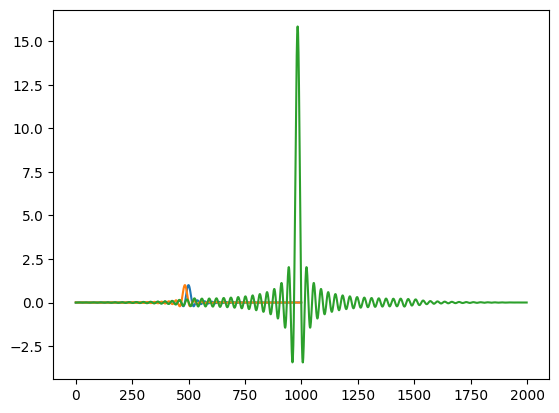

In [123]:
t = np.linspace(-5,5, 1000)*np.pi*2
r_11 = krysskorrelasjon(np.sinc(t+2),np.sinc(t+1))

plt.plot(np.sinc(t))
plt.plot(np.sinc(t+1))
plt.plot(r_11)
plt.show()

Utregning av krysskorrelasjon mellom dataen fra mikrofonene

In [134]:
r_12 = krysskorrelasjon(mic_1,mic_2)
r_13 = krysskorrelasjon(mic_1,mic_3)
r_23 = krysskorrelasjon(mic_2,mic_3)

Krysskorrelasjonen har en spike ved 26252
Krysskorrelasjonen har en spike ved 26251
Krysskorrelasjonen har en spike ved 26248


Plot av krysskorrelasjoner

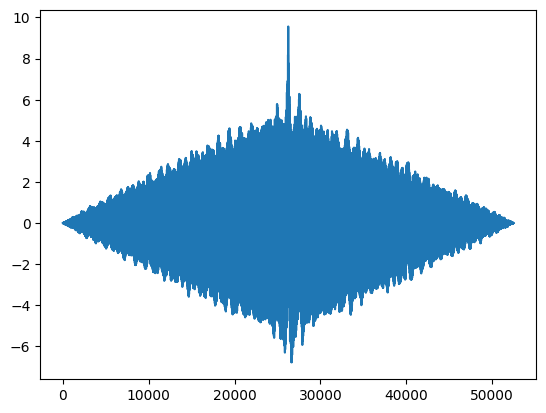

Delay mellom mikrofon mic 1 og mic 2 i sekunder: -0.087392 s
Krysskorrelasjonen har en spike ved 26251
Autokorrelasjonen har en spike ved 26249
Delay mellom mikrofon mic 1 og mic 3 i antall samples: 2


np.int64(2)

In [135]:
plt.plot(r_12)
plt.show()

delay(mic_1,mic_2, 1, 2)
delay_samples(mic_1, mic_3, 1, 3)

Utregning av autokorrelasjoner

In [138]:
r_11 = autokorrelasjon(mic_1) 
r_22 = autokorrelasjon(mic_2)
r_33 = autokorrelasjon(mic_3)

Autokorrelasjonen har en spike ved 26249
Autokorrelasjonen har en spike ved 26249
Autokorrelasjonen har en spike ved 26249


Plot av autokorrelajoner

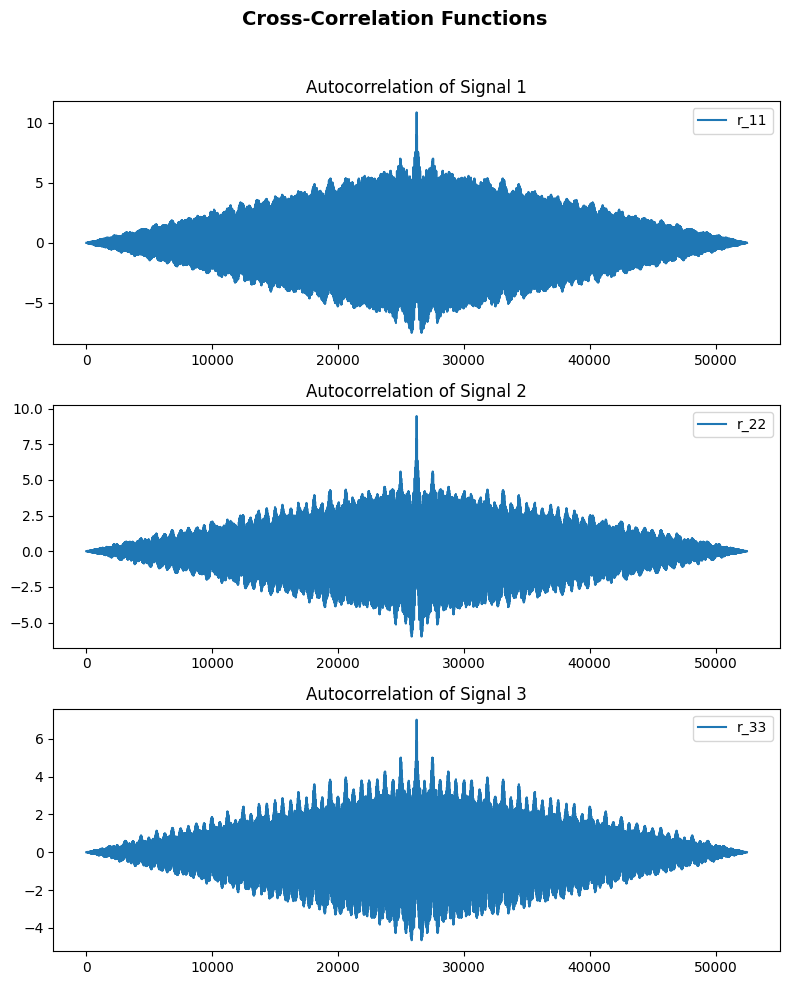

In [139]:
# Create a new figure
plt.figure(figsize=(8, 10))  # Adjust size as needed

# Common title
plt.suptitle("Cross-Correlation Functions", fontsize=14, fontweight='bold')

# First plot
plt.subplot(3, 1, 1)  # (rows, columns, index)
plt.plot(r_11, label="r_11")
plt.title("Autocorrelation of Signal 1")
plt.legend()

# Second plot
plt.subplot(3, 1, 2)
plt.plot(r_22, label="r_22")
plt.title("Autocorrelation of Signal 2")
plt.legend()

# Third plot
plt.subplot(3, 1, 3)
plt.plot(r_33, label="r_33")
plt.title("Autocorrelation of Signal 3")
plt.legend()

# Show all plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()


